In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Data Exploration

In [2]:
data = pd.read_csv("Diabetes_Diagnosis.csv")
data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin_Level,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isna().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin_Level                 0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [5]:
print(data["Outcome"].unique())
print(data["Pregnancies"].unique())
print()

[1 0]
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]



In [6]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin_Level               768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


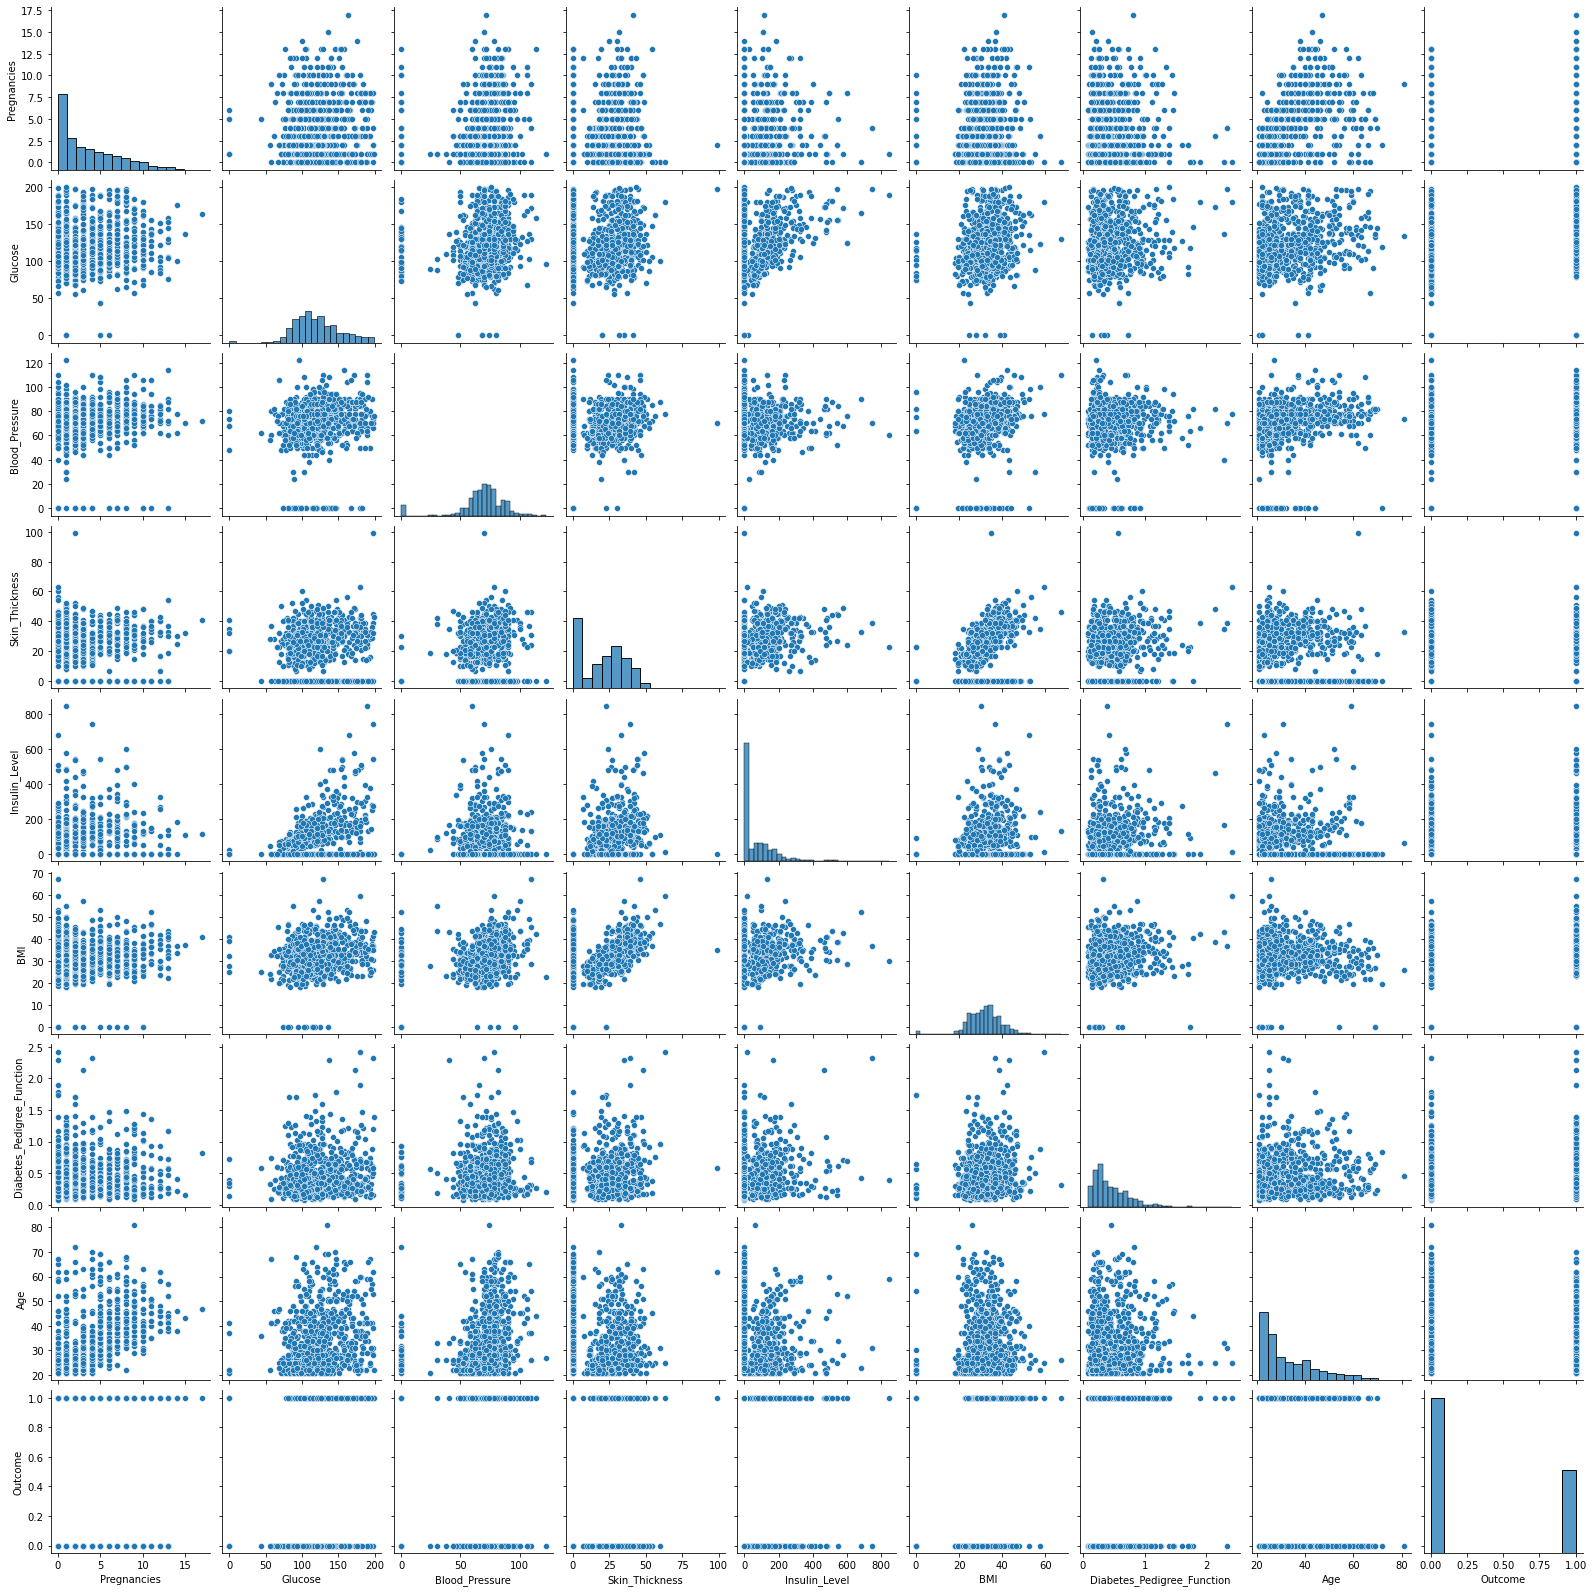

In [8]:
sns.pairplot(data)

In [9]:
data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin_Level,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.corr()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin_Level,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood_Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin_Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin_Level,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_Pedigree_Function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Feature Engineering

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
X.head()


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin_Level,BMI,Diabetes_Pedigree_Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 1)

x_ros, y_ros = ros.fit_resample(X, y)

final_data = x_ros.merge(y_ros, left_index = True, right_index = True)
final_data.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin_Level,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
final_data["Outcome"].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

## Modelling

In [16]:
X = final_data.iloc[:, :-1]
y = final_data.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
model = RandomForestClassifier()

In [28]:
#USING THE RANDOMIZEDSEARCHCV

#Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(100, 1200, num = 12)]

#Number pf features to consider at every split
max_features = ["sqrt"]

# Maximum number of levels in the trees (depth)
max_depth = [int(x) for x in np.linspace(5, 60, num = 6)]

#Min samples required to split a node
min_samples_split = [2, 5, 10, 15, 100, 120]
                     
#Min samples required at each leaf
min_samples_leaf = [1, 2, 5, 10]

In [29]:
random_grid = {"n_estimators": n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [30]:
random_model = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 6, verbose = 2, 
                                 random_state = 42, n_jobs = 1)

In [31]:
random_model.fit(X_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.3s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.2s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.2s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.2s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 16, 27, 38, 49, 60],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 100,
                                                              120],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [32]:
random_model.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60}

In [33]:
random_model.best_score_

0.836279130662477

## Prediction And Evaluation

In [34]:
prediction = random_model.predict(X_test)

In [35]:
confusion_matrix(prediction, y_test)

array([[77,  9],
       [22, 92]], dtype=int64)

In [44]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        86
           1       0.91      0.81      0.86       114

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



In [38]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
predc = model1.predict(X_test)

In [40]:
print(classification_report(y_test, predc))

              precision    recall  f1-score   support

           0       0.87      0.72      0.78        99
           1       0.76      0.89      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

